# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['bairnsdale',
 'tasiilaq',
 'coahuayana',
 'byron bay',
 'pitimbu',
 'rikitea',
 'albany',
 'bulawayo',
 'busselton',
 'bredasdorp',
 'ixtapa',
 'qaanaaq',
 'novopokrovka',
 'upernavik',
 'mataura',
 'nago',
 'longyearbyen',
 'chuy',
 'aleksandrov gay',
 'carnarvon',
 'zholymbet',
 'mwinilunga',
 'nanortalik',
 'hermanus',
 'stolbishche',
 'taolanaro',
 'vestmannaeyjar',
 'povenets',
 'salalah',
 'abu samrah',
 'kavaratti',
 'contai',
 'korla',
 'west bay',
 'sungaipenuh',
 'arraial do cabo',
 'georgetown',
 'souillac',
 'port alfred',
 'radyvyliv',
 'kendari',
 'saint-philippe',
 'ostrovnoy',
 'bacolod',
 'norman wells',
 'ushuaia',
 'chongwe',
 'mackay',
 'padang',
 'killybegs',
 'barcelos',
 'cabo san lucas',
 'okhotsk',
 'kavieng',
 'sao filipe',
 'te anau',
 'barrow',
 'bay city',
 'yuancheng',
 'bolungarvik',
 'guilin',
 'richards bay',
 'belushya guba',
 'kouqian',
 'ahipara',
 'avarua',
 'jamestown',
 'butaritari',
 'cape town',
 'sabang',
 'punta arenas',
 'miedzyrzec podlask

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# assign open weather api_key
api_key = api_key

In [5]:
 #create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# create empty list to contain our values
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # make our sample smaller
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
    
    query_url = base_url +"&q=" + city
    
    #json respose for the study
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record  {city_counter} of Set {set_counter} | {city}")
    
    # Iterate by one every time
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")        
print("Completed Beginning Data Retrieval")



Beginning Data Retrieval
Processing Record  1 of Set 1 | bairnsdale
Processing Record  2 of Set 1 | tasiilaq
Processing Record  3 of Set 1 | coahuayana
Processing Record  4 of Set 1 | byron bay
Processing Record  5 of Set 1 | pitimbu
Processing Record  6 of Set 1 | rikitea
Processing Record  7 of Set 1 | albany
Processing Record  8 of Set 1 | bulawayo
Processing Record  9 of Set 1 | busselton
Processing Record  10 of Set 1 | bredasdorp
Processing Record  11 of Set 1 | ixtapa
Processing Record  12 of Set 1 | qaanaaq
Processing Record  13 of Set 1 | novopokrovka
Processing Record  14 of Set 1 | upernavik
Processing Record  15 of Set 1 | mataura
Processing Record  16 of Set 1 | nago
Processing Record  17 of Set 1 | longyearbyen
Processing Record  18 of Set 1 | chuy
Processing Record  19 of Set 1 | aleksandrov gay
Processing Record  20 of Set 1 | carnarvon
Processing Record  21 of Set 1 | zholymbet
Processing Record  22 of Set 1 | mwinilunga
Processing Record  23 of Set 1 | nanortalik
Proc

In [6]:
# Create a dictionary to hold our data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          82
Cloudiness    82
Country       82
Date          82
Humidity      82
Lat           82
Lng           82
Max Temp      82
Wind Speed    82
dtype: int64

In [7]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bairnsdale,0,AU,1584058422,40,-37.83,147.62,82.0,5.99
1,Tasiilaq,8,GL,1584058423,66,65.61,-37.64,14.0,19.46
2,Coahuayana Viejo,40,MX,1584058423,83,18.73,-103.68,77.0,11.41
3,Byron Bay,42,AU,1584058425,65,-28.65,153.62,79.0,12.75
4,Pitimbu,75,BR,1584058425,88,-7.47,-34.81,78.8,5.82


In [8]:
# create dataframe csv
weather_csv = weather_df.to_csv(index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

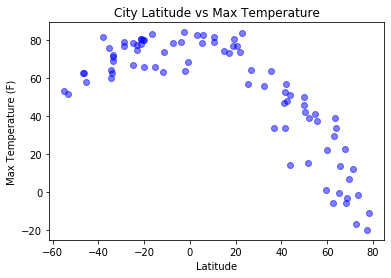

In [9]:
# scatter plot Latitude vs. Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

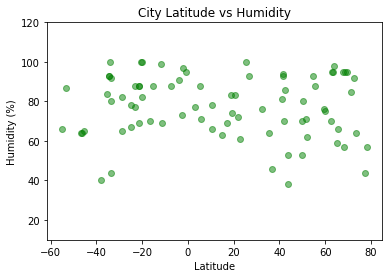

In [10]:
#scatter plot Latitude vs.Latitude vs. Humidity 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='g', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

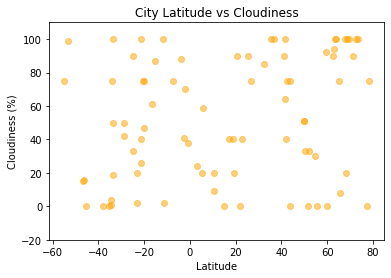

In [11]:
#scatter plot Latitude vs.Latitude vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='orange', alpha=0.5)

plt.ylim(-20,(weather_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

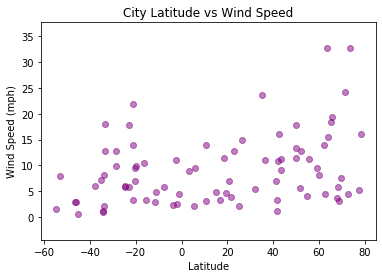

In [12]:
#scatter plot Latitude vs.Wind Speed 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color='purple', alpha=0.5)

plt.ylim((weather_df["Wind Speed"].min()-5),(weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.savefig("LatVsWind.png")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere dataframe
Northern_df = weather_df[weather_df["Lat"] >= 0]
Northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Tasiilaq,8,GL,1584058423,66,65.61,-37.64,14.00,19.46
2,Coahuayana Viejo,40,MX,1584058423,83,18.73,-103.68,77.00,11.41
6,Albany,75,US,1584057648,86,42.60,-73.97,48.20,16.11
10,Ixtapa,90,MX,1584058428,83,20.70,-105.20,77.00,6.93
11,Qaanaaq,0,GL,1584058428,44,77.48,-69.36,-19.97,5.26
12,Novopokrovka,51,UA,1584058428,53,49.84,36.55,50.00,17.90
13,Upernavik,100,GL,1584058428,92,72.79,-56.15,-16.85,4.54
15,Nago,75,JP,1584058429,93,26.59,127.98,64.40,14.99
16,Longyearbyen,75,SJ,1584058429,57,78.22,15.64,-11.20,16.11
18,Aleksandrov Gay,33,RU,1584058429,80,50.15,48.57,42.46,11.43


In [15]:
# southern Hemisphere dataframe
Southern_df = weather_df[weather_df["Lat"] < 0]
Southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bairnsdale,0,AU,1584058422,40,-37.83,147.62,82.00,5.99
3,Byron Bay,42,AU,1584058425,65,-28.65,153.62,79.00,12.75
4,Pitimbu,75,BR,1584058425,88,-7.47,-34.81,78.80,5.82
5,Rikitea,2,PF,1584058426,77,-23.12,-134.97,77.79,17.90
7,Bulawayo,47,ZW,1584058426,82,-20.15,28.58,65.80,9.57
8,Busselton,19,AU,1584058427,44,-33.65,115.33,69.01,18.05
9,Bredasdorp,4,ZA,1584058428,93,-34.53,20.04,64.40,1.12
14,Mataura,16,NZ,1584058428,64,-46.19,168.86,63.00,3.00
17,Chui,50,UY,1584058429,92,-33.70,-53.46,71.26,8.08
19,Carnarvon,90,AU,1584058429,78,-24.87,113.63,78.80,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

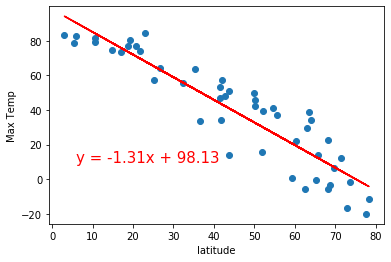

In [16]:
# Add the linear regression equation and line to plot Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = Northern_df['Lat']
y_values = Northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

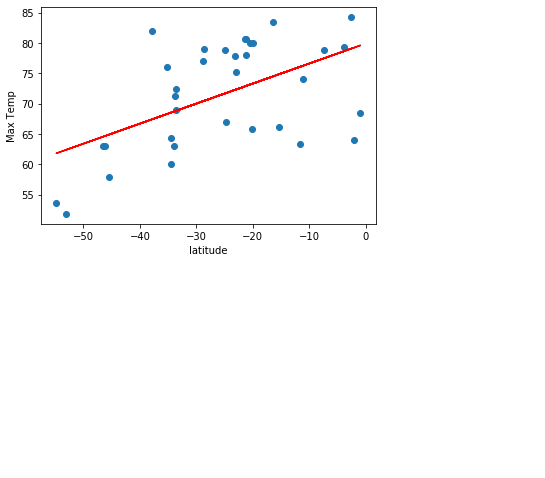

In [17]:
# Add the linear regression equation and line to plot Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = Southern_df['Lat']
y_values = Southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temp')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

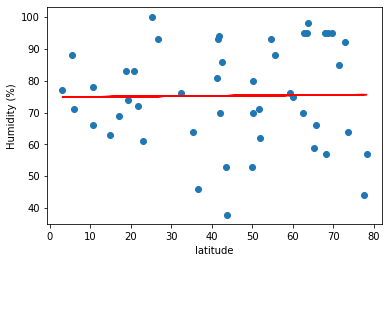

In [18]:
# Add the linear regression equation and line to plot Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Northern_df['Lat']
y_values = Northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.show()


 #Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

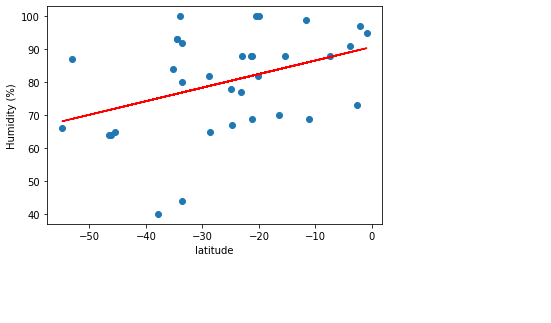

In [19]:
# Add the linear regression equation and line to plot Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Southern_df['Lat']
y_values = Southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.show()


  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

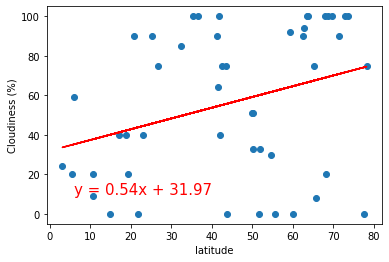

In [20]:
# Add the linear regression equation and line to plot Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Northern_df['Lat']
y_values = Northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness (%)')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

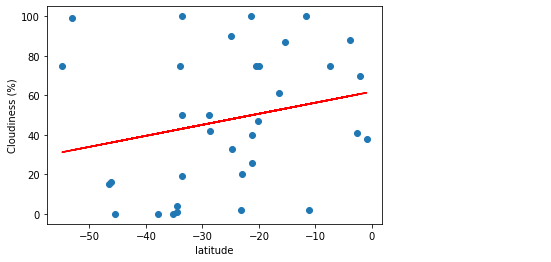

In [21]:
# Add the linear regression equation and line to plot Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Southern_df['Lat']
y_values = Southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

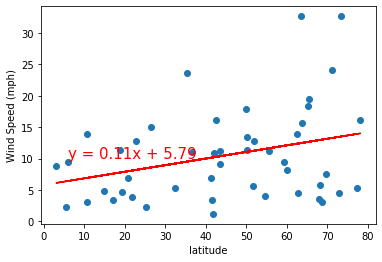

In [22]:
# Add the linear regression equation and line to plot Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Northern_df['Lat']
y_values = Northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

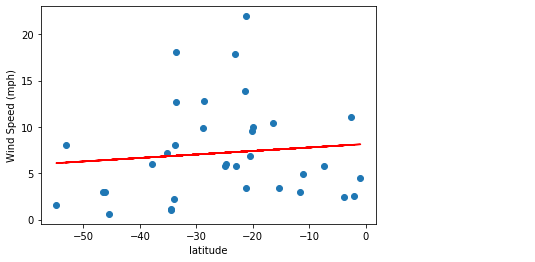

In [23]:
# Add the linear regression equation and line to plot Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Southern_df['Lat']
y_values = Southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()